# Random Forest Regressor Model

## EDA

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('encoded_df.csv')

In [3]:
# convert date column to datetime
df['relDate'] = pd.to_datetime(df['relDate'])

df['relYear'] = df['relDate'].dt.year
df['month'] = df['relDate'].dt.month
df['day'] = df['relDate'].dt.day

df = df.drop(columns='relDate')

In [4]:
df = df.drop(columns='id')

In [5]:
df.head()

,date,minute,rating,relCountry_Argentina,relCountry_Australia,relCountry_Brazil,relCountry_Canada,relCountry_China,relCountry_Czechia,relCountry_Denmark,...,language_Tamil,language_Telugu,language_Thai,language_Turkish,language_Ukrainian,language_Urdu,language_Vietnamese,relYear,month,day
0,2023.0,114.0,3.86,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,7,6
1,1999.0,139.0,4.27,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1999,9,10
2,2023.0,181.0,4.23,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,7,11
3,2019.0,122.0,3.85,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,8,31
4,2018.0,117.0,4.42,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018,12,1


## Random Forest Regression

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [7]:
y = df['minute']
X = df.drop(['minute'], axis=1)
X.head()

,date,rating,relCountry_Argentina,relCountry_Australia,relCountry_Brazil,relCountry_Canada,relCountry_China,relCountry_Czechia,relCountry_Denmark,relCountry_France,...,language_Tamil,language_Telugu,language_Thai,language_Turkish,language_Ukrainian,language_Urdu,language_Vietnamese,relYear,month,day
0,2023.0,3.86,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,7,6
1,1999.0,4.27,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1999,9,10
2,2023.0,4.23,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,7,11
3,2019.0,3.85,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,8,31
4,2018.0,4.42,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018,12,1


### Build the Model

In [8]:
# Split the data into training and test sets, with a 30% split size -> 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [10]:
y_pred = regressor.predict(X_test)

### Evaluate the Model

In [11]:
mse = metrics.mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = metrics.r2_score(y_test, y_pred)
print(f'R-squared: {r2}')
scorer = metrics.make_scorer(metrics.r2_score)
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=scorer)
print(f'Cross-validation R² scores: {cv_scores}')
print(f'Mean R² score (cross-validation): {cv_scores.mean()}')
print(f'Standard Deviation of R² scores(cross-validation): {cv_scores.std()}')

Mean Squared Error: 446.1512214767039
R-squared: 0.6215742365023652
Cross-validation R² scores: [0.62544166 0.4856553  0.61662729 0.66568298 0.68241919]
Mean R² score (cross-validation): 0.6151652859687287
Standard Deviation of R² scores(cross-validation): 0.06921806714763519


### Visualization

Let's see how strong a correlation there is between the predicted and actual runtimes using a scatterplot.

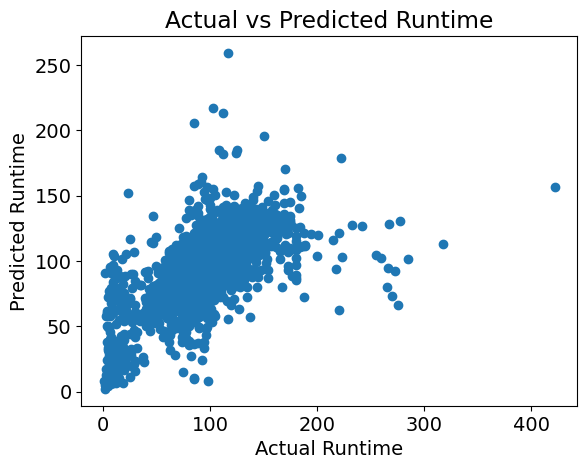

In [12]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Runtime')
plt.ylabel('Predicted Runtime')
plt.title('Actual vs Predicted Runtime')
plt.show()

We can see the correlation is positive but there are many outliers. We can also not that it appears that the predicted runtime for the extremely long movies is poorer in accuracy. Maybe we can drop these extremely long runtime movies to get a better set.

### Tuning

First let's see which features are the most important, or rather the least important, in the model and drop them from the data set.

In [13]:
importances = regressor.feature_importances_
features = X.columns

feature_importance = list(zip(features, importances))

sorted_features = sorted(feature_importance, key=lambda x: x[1])

#### Drop low feature importance columns

In [14]:
least_important = sorted_features[:20]

print("20 least important features: ")
for feature, importance in least_important: 
    print(f"{feature}: {importance:.4f}")

20 least important features: 
studio_The Essanay Film Manufacturing Company: 0.0000
studio_Československá televízia Bratislava: 0.0000
country_Bangladesh: 0.0000
country_Puerto Rico: 0.0000
language_Kannada: 0.0000
language_Malayalam: 0.0000
language_Marathi: 0.0000
language_Oriya: 0.0000
language_Slovene: 0.0000
studio_Vitagraph Company of America: 0.0000
studio_Pathé Frères: 0.0000
country_Malaysia: 0.0000
studio_Walter Lantz Productions: 0.0000
language_Tamil: 0.0000
language_Latvian: 0.0000
language_Lithuanian: 0.0000
studio_Československá televize Praha: 0.0000
language_Malay: 0.0000
language_Bengali, Bangla: 0.0000
country_Slovenia: 0.0000


It appears there are many features with extremely small to no importance in the model. Let's drop them to help make the data less sparse which should help the model.

In [15]:
features_0_import = [feature for feature, importance in feature_importance if importance < 0.0001]
print("Least important features: ")
for feature in features_0_import: 
    print(feature)

Least important features: 
studio_Fox Film Corporation
studio_Monogram Pictures
studio_ORF
studio_Pathé Frères
studio_RTS
studio_Shaw Brothers
studio_The Essanay Film Manufacturing Company
studio_Universal Film Manufacturing Company
studio_Vitagraph Company of America
studio_Viva Films
studio_Walter Lantz Productions
studio_Warner Bros. Cartoons
studio_Československá televize Praha
studio_Československá televízia Bratislava
studio_Česká televize
country_Bangladesh
country_Bulgaria
country_Chile
country_Colombia
country_Croatia
country_Cuba
country_Egypt
country_Estonia
country_Iceland
country_Indonesia
country_Iran
country_Israel
country_Kazakhstan
country_Latvia
country_Malaysia
country_Peru
country_Puerto Rico
country_Serbia
country_Singapore
country_Slovakia
country_Slovenia
country_South Africa
country_Taiwan
country_Uruguay
country_Yugoslavia
language_Bengali, Bangla
language_Bulgarian
language_Catalan
language_Croatian
language_Estonian
language_Finnish
language_Georgian
language

In [16]:
print(len(features_0_import))

64


In [17]:
print(df.shape)
df_dropped = df.drop(columns=features_0_import)
df_dropped.shape

(17313, 248)


(17313, 184)

In [18]:
y_dropped = df_dropped['minute']
X_dropped = df_dropped.drop(['minute'], axis=1)

# Split the data into training and test sets, with a 30% split size -> 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(X_dropped, y_dropped, test_size=0.3)

regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = metrics.r2_score(y_test, y_pred)
print(f'R-squared: {r2}')
scorer = metrics.make_scorer(metrics.r2_score)
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=scorer)
print(f'Cross-validation R² scores: {cv_scores}')
print(f'Mean R² score (cross-validation): {cv_scores.mean()}')
print(f'Standard Deviation of R² scores(cross-validation): {cv_scores.std()}')

Mean Squared Error: 427.51006829033497
R-squared: 0.6581978693622887
Cross-validation R² scores: [0.4617236  0.66625173 0.66355247 0.60270461 0.5599191 ]
Mean R² score (cross-validation): 0.5908303008124575
Standard Deviation of R² scores(cross-validation): 0.07581813540562679


#### Drop very long runtimes from dataset

In [19]:
long_runtime = df_dropped[df_dropped['minute'] >= 300]
print(long_runtime.shape)

(11, 184)


In [20]:
short_runtime = df_dropped[df_dropped['minute'] < 300]
short_runtime.shape

(17302, 184)

In [21]:
y_short = short_runtime['minute']
X_short = short_runtime.drop(['minute'], axis=1)

# Split the data into training and test sets, with a 30% split size -> 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(X_short, y_short, test_size=0.3)

regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = metrics.r2_score(y_test, y_pred)
print(f'R-squared: {r2}')
scorer = metrics.make_scorer(metrics.r2_score)
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=scorer)
print(f'Cross-validation R² scores: {cv_scores}')
print(f'Mean R² score (cross-validation): {cv_scores.mean()}')
print(f'Standard Deviation of R² scores(cross-validation): {cv_scores.std()}')

Mean Squared Error: 385.5747601232903
R-squared: 0.6705676775612346
Cross-validation R² scores: [0.63047867 0.6673278  0.67379998 0.64560989 0.68002526]
Mean R² score (cross-validation): 0.6594483188863153
Standard Deviation of R² scores(cross-validation): 0.01855914686768006


We can see an improvement in the MSE and R-squared scores after dropping the extremely long running movies.

#### Drop movies longer than 3 hours

To further improve the model let's drop any movie longer than three hours as this is an abnormal length. According to a quick [search](https://www.theguardian.com/film/2024/apr/29/ideal-movie-running-time-is-92-minutes-poll-claims#:~:text=Recent%20research%20by%20What%20to,with%20110%20minutes%20in%201981.), the average length of movies has been increasing over time and the average length of a movie in 2022 was 141 minutes. Meaning the average movie will still be within the 3 hour mark.


In [22]:
long_runtime = df_dropped[df_dropped['minute'] > 180]
print(long_runtime.shape)

(123, 184)


In [23]:
shortest_runtime = df_dropped[df_dropped['minute'] <= 180]
shortest_runtime.shape

(17190, 184)

In [24]:
y_shortest = shortest_runtime['minute']
X_shortest = shortest_runtime.drop(['minute'], axis=1)

# Split the data into training and test sets, with a 30% split size -> 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(X_shortest, y_shortest, test_size=0.3)

regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = metrics.r2_score(y_test, y_pred)
print(f'R-squared: {r2}')
scorer = metrics.make_scorer(metrics.r2_score)
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=scorer)
print(f'Cross-validation R-squared scores: {cv_scores}')
print(f'Mean R-squared score (cross-validation): {cv_scores.mean()}')
print(f'Standard Deviation of R-squared scores(cross-validation): {cv_scores.std()}')

Mean Squared Error: 298.1006892864068
R-squared: 0.7194536264841618
Cross-validation R-squared scores: [0.71575153 0.69968412 0.69886696 0.73427322 0.68317401]
Mean R-squared score (cross-validation): 0.7063499685526312
Standard Deviation of R-squared scores(cross-validation): 0.017353107022942856


We can see that both the R-squared score and the MSE improved by removing the long running films.

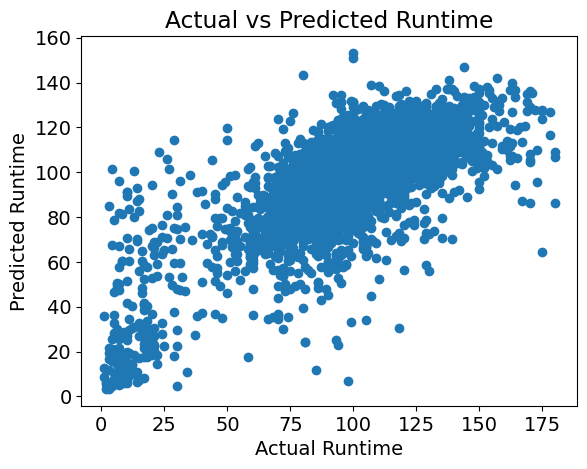

In [25]:
plt.rcParams.update({'font.size': 14})
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Runtime')
plt.ylabel('Predicted Runtime')
plt.title('Actual vs Predicted Runtime')
plt.show()

We can see the model is having more trouble predicting the runtime of short films. Let's drop anything that is considered a short film ([less than or equal to 40 minutes](https://www.torontofilmschool.ca/blog/film-production/how-long-is-a-short-film-well-that-depends/)) and see if the model improves. 

In [26]:
mid_runtime = shortest_runtime[shortest_runtime['minute'] > 40]
mid_runtime.shape

(15564, 184)

In [27]:
y_mid = mid_runtime['minute']
X_mid = mid_runtime.drop(['minute'], axis=1)

# Split the data into training and test sets, with a 30% split size -> 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(X_mid, y_mid, test_size=0.3)

regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = metrics.r2_score(y_test, y_pred)
print(f'R-squared: {r2}')
scorer = metrics.make_scorer(metrics.r2_score)
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=scorer)
print(f'Cross-validation R-squared scores: {cv_scores}')
print(f'Mean R-squared score (cross-validation): {cv_scores.mean()}')
print(f'Standard Deviation of R-squared scores(cross-validation): {cv_scores.std()}')

Mean Squared Error: 251.67228049250534
R-squared: 0.40385611182818526
Cross-validation R-squared scores: [0.42253105 0.36008663 0.37346743 0.43505343 0.39281133]
Mean R-squared score (cross-validation): 0.39678997227715274
Standard Deviation of R-squared scores(cross-validation): 0.02840282160301235


We can see that the MSE greatly improved but the R-squared value greatly decreased. So this model is much worse at explaining the variablity in the data.

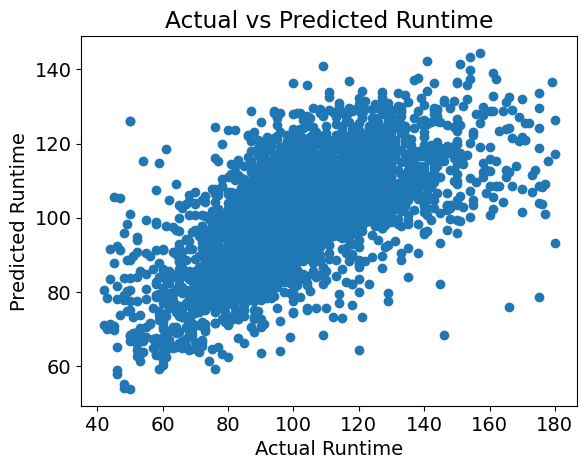

In [28]:
plt.rcParams.update({'font.size': 14})
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Runtime')
plt.ylabel('Predicted Runtime')
plt.title('Actual vs Predicted Runtime')
plt.show()

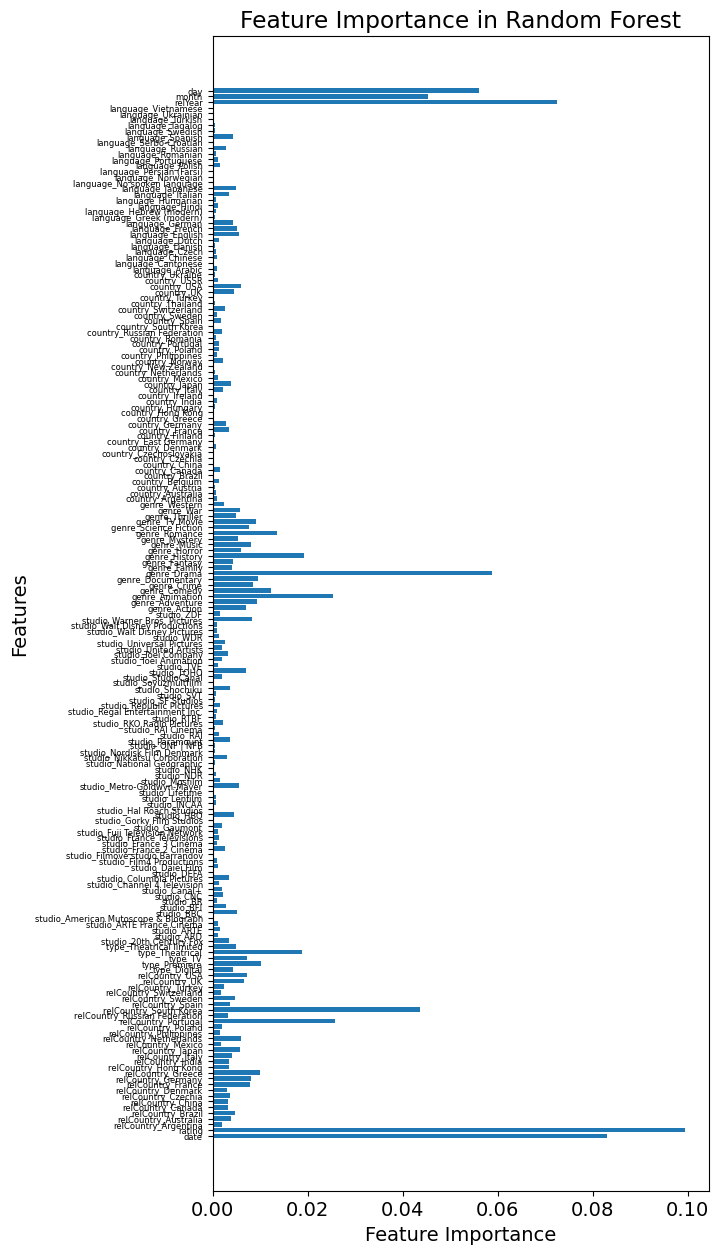

In [29]:
importances = regressor.feature_importances_
features = X_shortest.columns

fig = plt.figure()
fig.set_figheight(15)

plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.yticks(fontsize=6)
plt.show()

#### Drop least impactful feature groupings

We will stick with the shortest_runtime data frame (leaving short films in) as it has the best scores we have seen so far.

In [30]:
drop_languages = shortest_runtime.filter(like='language', axis=1).columns

df_no_lang = shortest_runtime.drop(columns=drop_languages)
df_no_lang.shape

(17190, 155)

In [31]:
drop_country = df_no_lang.filter(like='country', axis=1).columns

df_no_lang_country = df_no_lang.drop(columns=drop_country)
df_no_lang_country.shape

(17190, 115)

In [32]:
y_no_lang_country = df_no_lang_country['minute']
X_no_lang_country = df_no_lang_country.drop(['minute'], axis=1)

# Split the data into training and test sets, with a 30% split size -> 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(X_no_lang_country, y_no_lang_country, test_size=0.3)

regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = metrics.r2_score(y_test, y_pred)
print(f'R-squared: {r2}')
scorer = metrics.make_scorer(metrics.r2_score)
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=scorer)
print(f'Cross-validation R² scores: {cv_scores}')
print(f'Mean R² score (cross-validation): {cv_scores.mean()}')
print(f'Standard Deviation of R² scores(cross-validation): {cv_scores.std()}')

Mean Squared Error: 309.12382270404305
R-squared: 0.705174924233422
Cross-validation R² scores: [0.69811067 0.71493797 0.70324518 0.7006861  0.70794451]
Mean R² score (cross-validation): 0.7049848858746903
Standard Deviation of R² scores(cross-validation): 0.005942799029309178


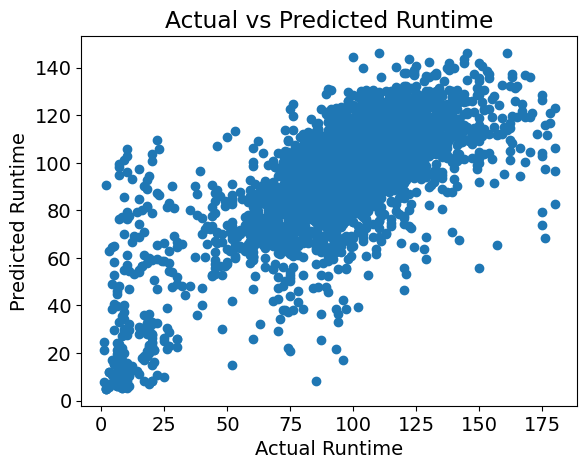

In [33]:
plt.rcParams.update({'font.size': 14})
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Runtime')
plt.ylabel('Predicted Runtime')
plt.title('Actual vs Predicted Runtime')
plt.show()

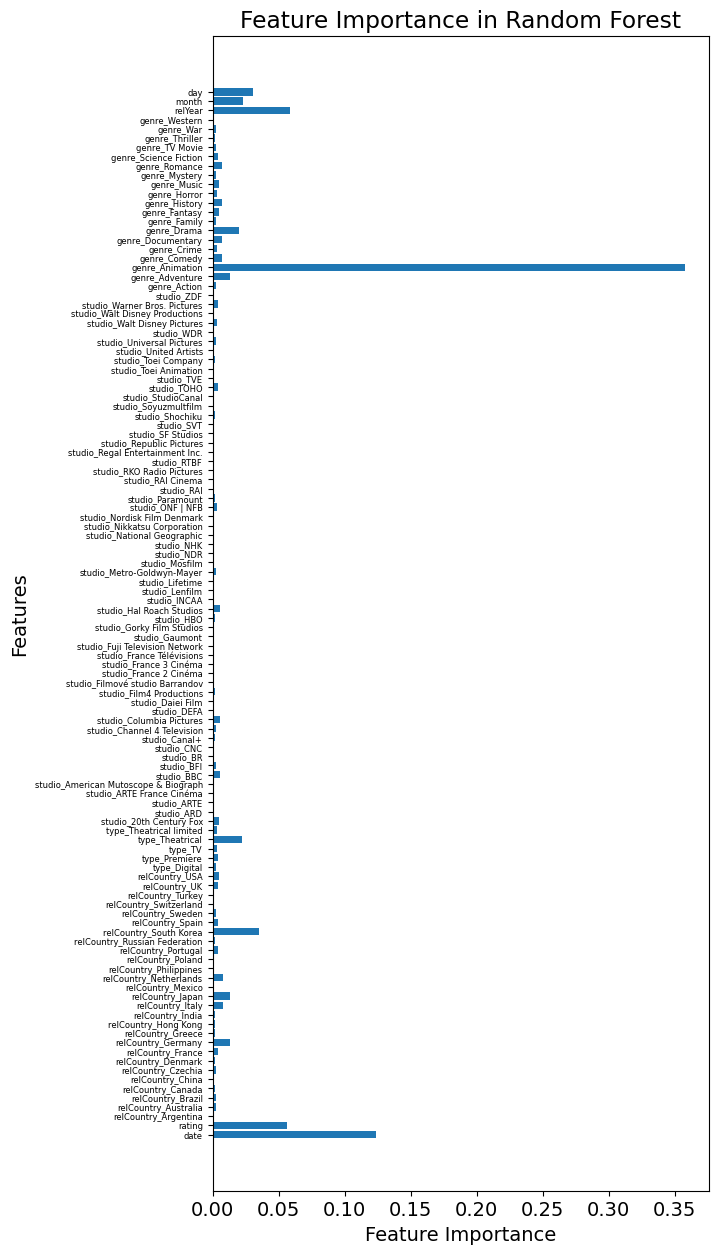

In [34]:
importances = regressor.feature_importances_
features = X_no_lang_country.columns

fig = plt.figure()
fig.set_figheight(15)

plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.yticks(fontsize=6)
plt.show()

### Just Genres

Using just genres let's see if we can predict runtime better than with the multiple features listed above.

In [35]:
columns_to_keep = [col for col in shortest_runtime.columns if col.startswith('genre') or col == 'minute']
genres_df = shortest_runtime[columns_to_keep]
genres_df.shape

(17190, 20)

In [36]:
y_genres = genres_df['minute']
X_genres = genres_df.drop(['minute'], axis=1)

# Split the data into training and test sets, with a 30% split size -> 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(X_genres, y_genres, test_size=0.3)

regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = metrics.r2_score(y_test, y_pred)
print(f'R-squared: {r2}')
scorer = metrics.make_scorer(metrics.r2_score)
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=scorer)
print(f'Cross-validation R-squared scores: {cv_scores}')
print(f'Mean R² score (cross-validation): {cv_scores.mean()}')
print(f'Standard Deviation of R-squared scores(cross-validation): {cv_scores.std()}')

Mean Squared Error: 520.5730653786783
R-squared: 0.5172725717635869
Cross-validation R-squared scores: [0.53136809 0.53935285 0.47146879 0.529852   0.49366823]
Mean R² score (cross-validation): 0.5131419911013941
Standard Deviation of R-squared scores(cross-validation): 0.02613161769264554


Note the MSE and the R-squared values are much worse when using just genre. 

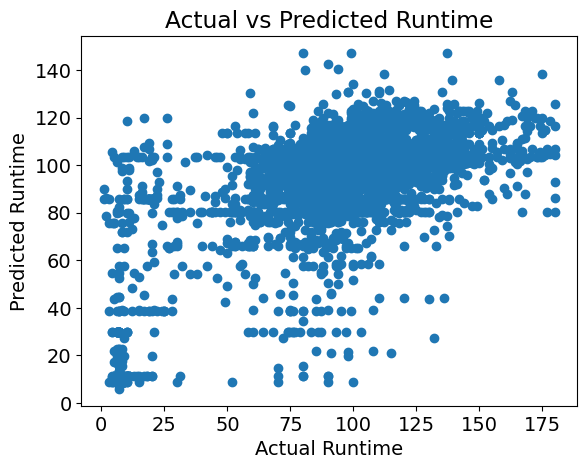

In [37]:
plt.rcParams.update({'font.size': 14})
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Runtime')
plt.ylabel('Predicted Runtime')
plt.title('Actual vs Predicted Runtime')
plt.show()

We can see from the graph above that the correlation has gotten weaker.

### Just Countries

In [38]:
columns_to_keep = [col for col in shortest_runtime.columns if col.startswith('relCountry') or col == 'minute']
rel_country_df = shortest_runtime[columns_to_keep]
rel_country_df.shape

(17190, 28)

In [39]:
y_rel_country = rel_country_df['minute']
X_rel_country = rel_country_df.drop(['minute'], axis=1)

# Split the data into training and test sets, with a 30% split size -> 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(X_rel_country, y_rel_country, test_size=0.3)

regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = metrics.r2_score(y_test, y_pred)
print(f'R-squared: {r2}')
scorer = metrics.make_scorer(metrics.r2_score)
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=scorer)
print(f'Cross-validation R-squared scores: {cv_scores}')
print(f'Mean R² score (cross-validation): {cv_scores.mean()}')
print(f'Standard Deviation of R-squared scores(cross-validation): {cv_scores.std()}')

Mean Squared Error: 792.5300709655346
R-squared: 0.24549330952184645
Cross-validation R-squared scores: [0.18626652 0.20360877 0.21699348 0.24050382 0.24471111]
Mean R² score (cross-validation): 0.21841673837158454
Standard Deviation of R-squared scores(cross-validation): 0.02206431929094972


We can see that these are the worst scores yet so we definitely will not be moving forward with this model.

### Just Release Date Information

In [40]:
columns_to_keep = ['minute', 'day', 'month', 'date']
rel_date_df = shortest_runtime[columns_to_keep]
rel_date_df.shape

(17190, 4)

In [41]:
y_rel_date = rel_date_df['minute']
X_rel_date = rel_date_df.drop(['minute'], axis=1)

# Split the data into training and test sets, with a 30% split size -> 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(X_rel_date, y_rel_date, test_size=0.3)

regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = metrics.r2_score(y_test, y_pred)
print(f'R-squared: {r2}')
scorer = metrics.make_scorer(metrics.r2_score)
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=scorer)
print(f'Cross-validation R-squared scores: {cv_scores}')
print(f'Mean R-squared score (cross-validation): {cv_scores.mean()}')
print(f'Standard Deviation of R-squared scores(cross-validation): {cv_scores.std()}')

Mean Squared Error: 1123.0637314946607
R-squared: -0.029823112937773066
Cross-validation R-squared scores: [-0.07417455 -0.00828766 -0.06330861  0.02421923 -0.02471616]
Mean R-squared score (cross-validation): -0.02925354930202422
Standard Deviation of R-squared scores(cross-validation): 0.036047573811975715


These scores are the worst we have seen by a large margin. Not the best model.

### Just Rating

In [42]:
columns_to_keep = ['rating', 'minute']
ratings_df = shortest_runtime[columns_to_keep]
ratings_df.shape

(17190, 2)

In [46]:
y_rating = genres_df['minute']
X_rating = genres_df.drop(['minute'], axis=1)

# Split the data into training and test sets, with a 30% split size -> 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(X_rating, y_rating, test_size=0.3)

regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = metrics.r2_score(y_test, y_pred)
print(f'R-squared: {r2}')
scorer = metrics.make_scorer(metrics.r2_score)
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=scorer)
print(f'Cross-validation R-squared scores: {cv_scores}')
print(f'Mean R² score (cross-validation): {cv_scores.mean()}')

Mean Squared Error: 487.9599078671886
R-squared: 0.5406533463073275
Cross-validation R-squared scores: [0.49193977 0.4961317  0.5215036  0.51725322 0.48810183]
Mean R² score (cross-validation): 0.502986024101185


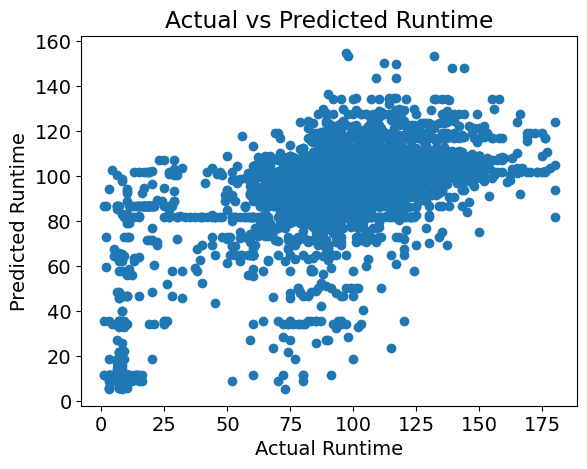

In [47]:
plt.rcParams.update({'font.size': 14})
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Runtime')
plt.ylabel('Predicted Runtime')
plt.title('Actual vs Predicted Runtime')
plt.show()

The R-squared value is not as good as other models, but the MSE is noticeably bad compared to some of the other models.

## Conclusion

In conclusion the best model that we were able to come up with is one featuring only limited features, those of some import, and a runtime less than three hours.

We rebuild the model below to show the final scores.

In [49]:
y_shortest = shortest_runtime['minute']
X_shortest = shortest_runtime.drop(['minute'], axis=1)

# Split the data into training and test sets, with a 30% split size -> 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(X_shortest, y_shortest, test_size=0.3)

regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = metrics.r2_score(y_test, y_pred)
print(f'R-squared: {r2}')
scorer = metrics.make_scorer(metrics.r2_score)
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=scorer)
print(f'Cross-validation R-squared scores: {cv_scores}')
print(f'Mean R-squared score (cross-validation): {cv_scores.mean()}')
print(f'Standard Deviation of R-squared scores(cross-validation): {cv_scores.std()}')

Mean Squared Error: 324.383601342835
R-squared: 0.6988743255168063
Cross-validation R-squared scores: [0.70439912 0.70012028 0.70965323 0.70176412 0.72646289]
Mean R-squared score (cross-validation): 0.7084799264717098
Standard Deviation of R-squared scores(cross-validation): 0.009554081995197479


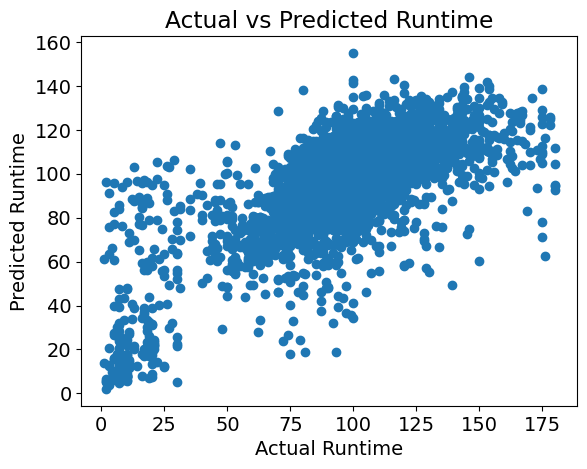

In [50]:
plt.rcParams.update({'font.size': 14})
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Runtime')
plt.ylabel('Predicted Runtime')
plt.title('Actual vs Predicted Runtime')
plt.show()

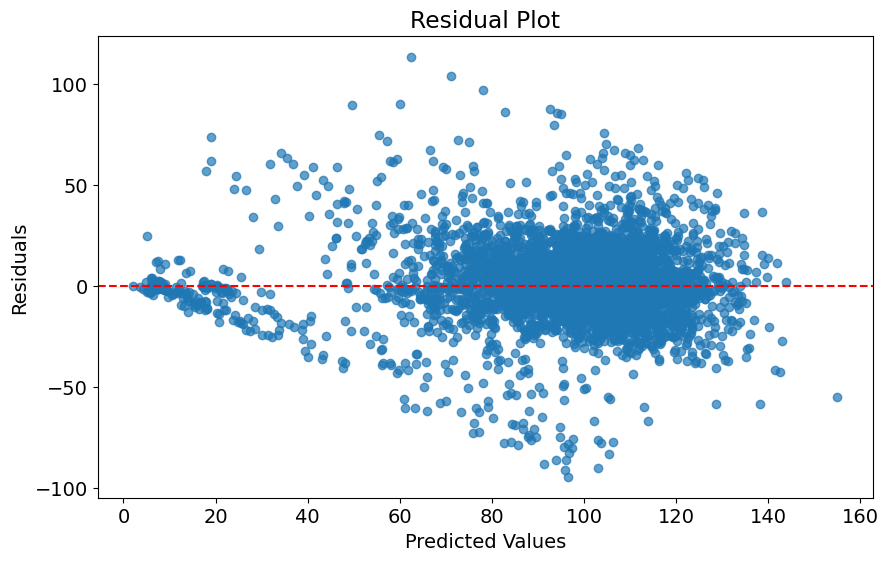

In [51]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6)) 
plt.scatter(y_pred, residuals, alpha=0.7) 
plt.axhline(y=0, color='r', linestyle='--') 
plt.xlabel('Predicted Values') 
plt.ylabel('Residuals') 
plt.title('Residual Plot') 
plt.show()

Based off the increase in the residuals as the predicted values increase we can assume that variance of the errors in the model is not constant. This is not ideal, but the general scattering of the residuals around the horizontal axis indicates a balanced model. We can also note that there are clearly some outliers in the graph indicating some data is not fit to the model well. 

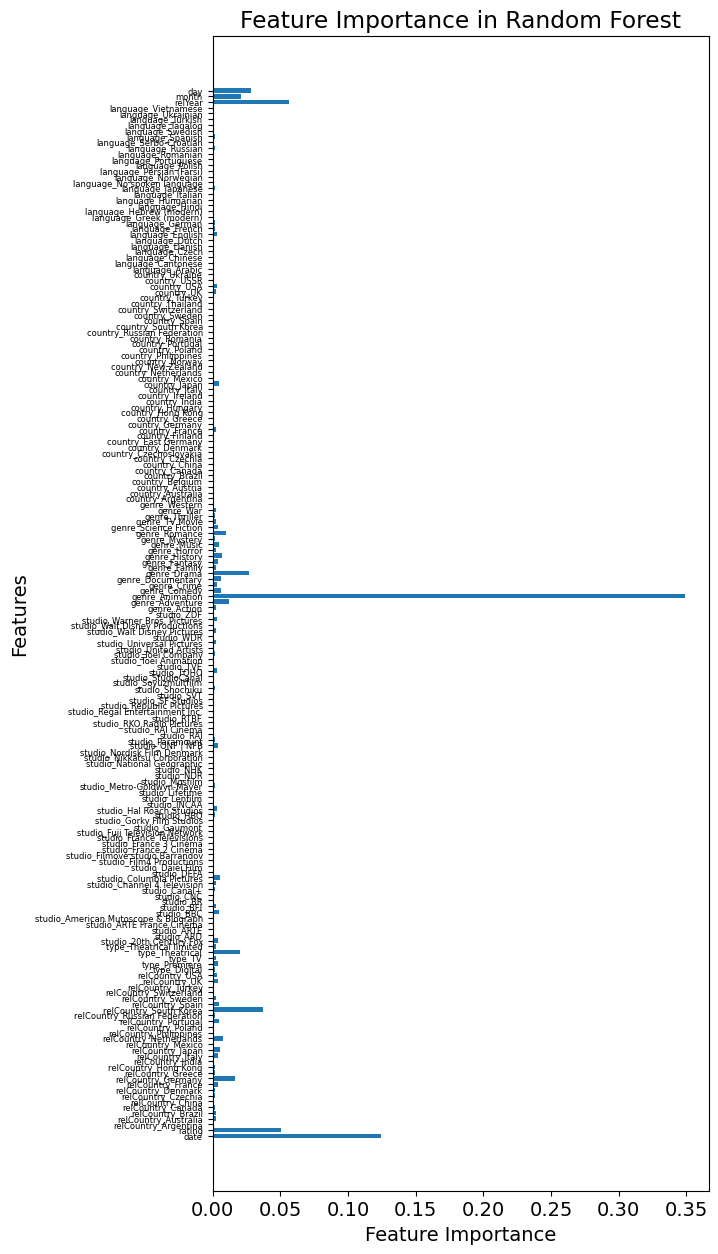

In [53]:
importances = regressor.feature_importances_
features = X_shortest.columns

fig = plt.figure()
fig.set_figheight(15)

plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.yticks(fontsize=6)
plt.show()